# Change of Degree Days in seasons
    
Written by Gesangyangji; updated Feb 7, 2021 <br>


In [1]:
import matplotlib                   
import matplotlib.pyplot as plt 
from matplotlib import cm
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import numpy as np                  
import pandas as pd 
import math
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings

from loadingdata import getvarsfordecades
from loadingdata import csv2dict


In [2]:
warnings.filterwarnings("ignore")

## Step 1: loading data for target variables

In [3]:
yrstr = ['2011_2030','2021_2040','2031_2050','2041_2060','2051_2070','2061_2080','2071_2090','2081_2100']; 
CityLname = ['MADISON','CHICAGO','ATLANTA','BOSTON', 'DALLAS', 'MIAMI', 'HOUSTON','NASHVILLE','OMAHA', 
             'STLOUIS', 'COLUMBUS','MINNEAPOLIS','NEWYORK', 'RALEIGH', 'WASHINGTONDC'] 
CitySname = ['MSN','MDW','ATL','BOS','DFW','MIA','IAH','BNA','OMA',
             'STL','CMH','MSP','JFK','RDU','IAD']

In [4]:
# check what vars are in the file
rawdata = csv2dict('MADISON', '2011_2030', 'rcp45') # data for different cities, scens,decades are in the same format
rawdata.keys()

dict_keys(['m', 'db1', 'db2', 'ws1', 'mdb1', 'ws2', 'mdb2', 'mws1', 'mwd1', 'x', 'mrange', 'mws3', 'mwd3', 'db', 'mcwb', 'wb', 'mcdb', 'extreme_max_wb', 'dp', 'hr', 'mcdb_dp', 'enthalpy', 'mcdb_enth', 'extreme_ws', 'mean_min', 'mean_max', 'sd_min', 'sd_max', 'T_n_min', 'T_n_max', 'Annual_Tavg', 'Tavg', 'Sd', 'Annual_HDD_10', 'HDD_10', 'Annual_HDD_183', 'HDD_183', 'Annual_CDD_10', 'CDD_10', 'Annual_CDD_183', 'CDD_183', 'Annual_CDH_233', 'CDH_233', 'Annual_CDH_267', 'CDH_267', 'M_DB_Range', 'Monthly_DB_db', 'Monthly_DB_wb', 'Monthly_WB_db', 'Monthly_WB_wb', 'mo_db_04', 'mo_mcwb_04', 'mo_db_2', 'mo_mcwb_2', 'mo_db_5', 'mo_mcwb_5', 'mo_db_10', 'mo_mcwb_10', 'mo_wb_04', 'mo_mcdb_04', 'mo_wb_2', 'mo_mcdb_2', 'mo_wb_5', 'mo_mcdb_5', 'mo_wb_10', 'mo_mcdb_10', 'hours8_4'])

## Step 2: calculate seasonal change:   
e.g.(spring2090-spring2020)/spring2020

1) select data for present, mid-, late- century

In [5]:
# select ur target var,scen, and load the data
df45_cdd1 = getvarsfordecades(CityLname,yrstr,'CDD_10','rcp45')
df85_cdd1 = getvarsfordecades(CityLname,yrstr,'CDD_10','rcp85')

df45_cdd2 = getvarsfordecades(CityLname,yrstr,'CDD_183','rcp45')
df85_cdd2 = getvarsfordecades(CityLname,yrstr,'CDD_183','rcp85')

# laoding heating degree days
df45_hdd1 = getvarsfordecades(CityLname,yrstr,'HDD_10','rcp45')
df85_hdd1 = getvarsfordecades(CityLname,yrstr,'HDD_10','rcp85')

df45_hdd2 = getvarsfordecades(CityLname,yrstr,'HDD_183','rcp45')
df85_hdd2 = getvarsfordecades(CityLname,yrstr,'HDD_183','rcp85')

df45_cdd2.head()

,city,lat,lon,2011_2030,2021_2040,2031_2050,2041_2060,2051_2070,2061_2080,2071_2090,2081_2100
0,MADISON,43.14N,89.35W,"[0.000000, 0.000000, 0.346049, 4.287350, 2...","[0.000000, 0.000000, 0.458675, 5.181381, 3...","[0.000000, 0.000000, 0.583090, 5.932292, 3...","[0.000000, 0.000000, 0.775661, 7.142319, 4...","[0.000000, 0.000000, 0.966871, 8.016686, 4...","[0.000000, 0.000000, 1.149367, 8.780654, 4...","[0.000000, 0.000000, 1.215255, 9.482593, 5...","[0.000000, 0.000000, 1.234477, 9.581726, 5..."
1,MINNEAPOLIS,44.88N,93.23W,"[0.000000, 0.000000, 0.167505, 4.644349, 3...","[0.000000, 0.000000, 0.226459, 5.604144, 3...","[0.000000, 0.000000, 0.292920, 6.341694, 4...","[0.000000, 0.000000, 0.404447, 7.559418, 4...","[0.000000, 0.000000, 0.503226, 8.334153, 5...","[0.000000, 0.000000, 0.580046, 9.146927, 5...","[0.000000, 0.000000, 0.660354, 9.962167, 5...","[0.000000, 0.000000, 0.690344, 10.138892, ..."
2,WASHINGTONDC,38.94N,77.45W,"[0.057027, 0.013641, 2.785666, 12.920449, ...","[0.111656, 0.022800, 3.182217, 14.896497, ...","[0.135850, 0.043098, 3.765994, 17.587530, ...","[0.164457, 0.055020, 4.254610, 20.509758, ...","[0.215504, 0.081336, 4.855648, 22.589178, ...","[0.228986, 0.099444, 5.292633, 24.304003, ...","[0.276681, 0.098294, 5.401986, 25.472878, ...","[0.406440, 0.118403, 5.502508, 25.726038, ..."
3,MIAMI,25.82N,80.3W,"[116.295295, 120.941693, 169.172993, 208.38...","[127.750514, 129.515159, 182.208748, 220.18...","[137.931630, 140.473739, 195.257113, 232.61...","[146.167604, 150.897368, 205.344459, 244.41...","[156.932426, 161.820213, 218.518901, 255.83...","[165.595787, 169.905536, 228.751247, 264.34...","[171.988792, 175.799251, 234.260500, 270.93...","[178.000316, 179.426127, 239.331691, 274.85..."
4,COLUMBUS,39.99N,82.88W,"[0.014825, 0.033836, 1.848038, 11.235559, ...","[0.033938, 0.046957, 2.258464, 13.503698, ...","[0.078334, 0.083770, 2.775791, 15.910771, ...","[0.107710, 0.104707, 3.267070, 18.930073, ...","[0.137305, 0.150159, 3.907059, 21.399549, ...","[0.171582, 0.176641, 4.323744, 22.978175, ...","[0.221778, 0.178014, 4.451873, 24.192691, ...","[0.325397, 0.190346, 4.566814, 24.755675, ..."


## Step 2: calculate seasonal change:   
e.g.(spring2090-spring2020)/spring2020

In [6]:
# get data for degree days with treshold 18.3 and for mind and late century
data_hdd45 = df45_hdd2[['city','lat','lon','2011_2030','2041_2060','2081_2100']]
data_hdd85 = df85_hdd2[['city','lat','lon','2011_2030','2041_2060','2081_2100']]

data_cdd45 = df45_cdd2[['city','lat','lon','2011_2030','2041_2060','2081_2100']]
data_cdd85 = df85_cdd2[['city','lat','lon','2011_2030','2041_2060','2081_2100']]
# data_hdd45

In [39]:
# some functions 
def str2num(li):
    newlist = []
    for val in li:
        newlist.append(int(round(float(val),0))) 
    return newlist

def str2num_latlon(oldlist):
    newlist = []
    for val in oldlist:
        newlist.append(float(val[:-1]))
    return newlist

def flip(lst):
    return [ -i for i in lst ] 

def get_seasonaldata(data):
    mon_data = data
    mon_data2 = str2num(mon_data)
    li1 = mon_data2[2:]
    li2 = mon_data2[:2]
    new_li = li1+li2 # make it start from march and edn with feb

    n=3 # 3 months per seasons
    list2 = [sum(new_li[i:i+n])//n for i in range(0,len(new_li),n)]
    return list2

def perctchange(list1,list2):
    changelst = []
    for i in range(len(list1)):
        if (list1[i]==0)&(list2[i]==0): # there is no change 
            perc_diff=0
        # if present value is 0 (denominator=0), then change is infinite,from 0 to some is a big change 
        elif list1[i]==0:
            perc_diff=math.inf 
        else:   
            perc_diff = (list2[i]-list1[i])/list1[i]
        changelst.append(round(perc_diff*100,2))
    return changelst 

def orderby_lat(df): 
#     df['orderbylat']=str2num_latlon(df['lat'])
    df.sort_values(by=['lat'],ascending=True,inplace=True)
#     df.drop(['orderbylat'],axis=1,inplace=True)
    return df

In [40]:
# order data through northern cities to southern cities 

data_hdd45 = orderby_lat(data_hdd45)
data_hdd85 = orderby_lat(data_hdd85)

data_cdd45 = orderby_lat(data_cdd45)
data_cdd85 = orderby_lat(data_cdd85)
data_hdd45.head(3)

,city,lat,lon,2011_2030,2041_2060,2081_2100
3,MIAMI,25.82N,80.3W,"[18.873437, 10.649015, 4.305640, 0.379393, ...","[13.136588, 7.193644, 2.558150, 0.173842, ...","[8.512108, 4.135251, 1.331612, 0.075163, 0..."
13,HOUSTON,29.99N,95.36W,"[176.406985, 122.500860, 65.239195, 13.4549...","[150.814433, 102.724637, 47.713277, 8.17757...","[130.317298, 83.754022, 38.205394, 5.844593..."
12,DALLAS,32.90N,97.04W,"[277.031220, 205.498297, 122.411029, 30.592...","[245.335864, 180.395664, 96.127421, 21.0815...","[222.833040, 156.333544, 82.882151, 16.0582..."


In [49]:
# data_hdd85['2081_2100'][3]

<font color=blue>#Note: from here, we will focus on rcp 8.5 <font/>

#get seasonal data for present(2020) and future (2090 under rcp 8.5)

In [43]:
season_hdd_2020 = []
season_hdd_2050 = []
season_hdd_2090 = []

season_cdd_2020 = []
season_cdd_2050 = []
season_cdd_2090 = []

for icity in range(len(data_cdd85['city'])):
    # hdd18.3
    mon_data1 = data_hdd85['2011_2030'][icity]    
    season_hdd_2020.append(get_seasonaldata(mon_data1)) 
    mon_data1 = data_hdd85['2081_2100'][icity]    
    season_hdd_2090.append(get_seasonaldata(mon_data1)) 
    
    # cdd18.3
    mon_data2 = data_cdd85['2011_2030'][icity]    
    season_cdd_2020.append(get_seasonaldata(mon_data2)) 
    mon_data2 = data_cdd85['2081_2100'][icity]    
    season_cdd_2090.append(get_seasonaldata(mon_data2)) 

In [69]:
# season_cdd_2090

[[44, 270, 67, 0],
 [46, 295, 72, 0],
 [75, 376, 122, 1],
 [366, 457, 418, 280],
 [73, 322, 105, 1],
 [112, 403, 146, 2],
 [126, 432, 172, 7],
 [127, 393, 162, 6],
 [147, 393, 181, 8],
 [35, 323, 100, 0],
 [38, 344, 118, 0],
 [69, 350, 103, 0],
 [200, 472, 245, 24],
 [253, 451, 285, 59],
 [67, 332, 101, 0]]

#get percentage change from present(2020) to future (2090 under rcp 8.5)

In [94]:
seasonchange_hdd_by50 = []
seasonchange_hdd_by90 = []
seasonchange_cdd_by50 = []
seasonchange_cdd_by90 = []

for icity in range(len(data_cdd85['city'])):
    seasonchange_hdd_by90.append(perctchange(season_hdd_2020[icity],season_hdd_2090[icity]))
    seasonchange_cdd_by90.append(perctchange(season_cdd_2020[icity],season_cdd_2090[icity]))

In [95]:
# seasonchange_cdd_by90

In [117]:
# add to the df for plotting 

data_hdd85['MAM_20']=''
data_hdd85['JJA_20']=''
data_hdd85['SON_20']=''
data_hdd85['DJF_20']=''

data_cdd85['MAM_20']=''
data_cdd85['JJA_20']=''
data_cdd85['SON_20']=''
data_cdd85['DJF_20']=''

data_hdd85['MAM_90']=''
data_hdd85['JJA_90']=''
data_hdd85['SON_90']=''
data_hdd85['DJF_90']=''

data_cdd85['MAM_90']=''
data_cdd85['JJA_90']=''
data_cdd85['SON_90']=''
data_cdd85['DJF_90']=''

data_hdd85['perchange_MAM']=''
data_hdd85['perchange_JJA']=''
data_hdd85['perchange_SON']=''
data_hdd85['perchange_DJF']=''

data_cdd85['perchange_MAM']=''
data_cdd85['perchange_JJA']=''
data_cdd85['perchange_SON']=''
data_cdd85['perchange_DJF']=''

for icity in range(len(data_cdd85['city'])):
    # # hdd
    data_hdd85['MAM_20'][icity] = season_hdd_2020[icity][0]
    data_hdd85['JJA_20'][icity] = season_hdd_2020[icity][1]
    data_hdd85['SON_20'][icity] = season_hdd_2020[icity][2]
    data_hdd85['DJF_20'][icity] = season_hdd_2020[icity][3]
    
    data_hdd85['MAM_90'][icity] = season_hdd_2090[icity][0]
    data_hdd85['JJA_90'][icity] = season_hdd_2090[icity][1]
    data_hdd85['SON_90'][icity] = season_hdd_2090[icity][2]
    data_hdd85['DJF_90'][icity] = season_hdd_2090[icity][3]
    
    data_hdd85['perchange_MAM'][icity] = seasonchange_hdd_by90[icity][0]
    data_hdd85['perchange_JJA'][icity] = seasonchange_hdd_by90[icity][1]
    data_hdd85['perchange_SON'][icity] = seasonchange_hdd_by90[icity][2]
    data_hdd85['perchange_DJF'][icity] = seasonchange_hdd_by90[icity][3]
    
    # # cdd
    data_cdd85['MAM_20'][icity] = season_cdd_2020[icity][0]
    data_cdd85['JJA_20'][icity] = season_cdd_2020[icity][1]
    data_cdd85['SON_20'][icity] = season_cdd_2020[icity][2]
    data_cdd85['DJF_20'][icity] = season_cdd_2020[icity][3]

    data_cdd85['MAM_90'][icity] = season_cdd_2090[icity][0]
    data_cdd85['JJA_90'][icity] = season_cdd_2090[icity][1]
    data_cdd85['SON_90'][icity] = season_cdd_2090[icity][2]
    data_cdd85['DJF_90'][icity] = season_cdd_2090[icity][3]

    data_cdd85['perchange_MAM'][icity] = seasonchange_cdd_by90[icity][0]
    data_cdd85['perchange_JJA'][icity] = seasonchange_cdd_by90[icity][1]
    data_cdd85['perchange_SON'][icity] = seasonchange_cdd_by90[icity][2]
    data_cdd85['perchange_DJF'][icity] = seasonchange_cdd_by90[icity][3]

data_cdd85.head()

,city,lat,lon,2011_2030,2041_2060,2081_2100,MAM_20_90,JJA_20_90,SON_20_90,DJF_20_90,...,SON_20,DJF_20,MAM_90,JJA_90,SON_90,DJF_90,perchange_MAM,perchange_JJA,perchange_SON,perchange_DJF
3,MIAMI,25.82N,80.3W,"[116.161650, 121.208439, 167.735338, 209.52...","[170.128652, 173.186680, 229.420833, 265.49...","[269.843696, 262.513734, 327.555776, 357.17...",65.61,34.41,54.24,124,...,271,125,366,457,418,280,65.61,34.41,54.24,124
13,HOUSTON,29.99N,95.36W,"[13.778945, 20.877813, 49.297536, 115.38499...","[23.647096, 33.151581, 80.730798, 161.01092...","[51.972313, 66.201515, 141.731337, 242.9136...",90.23,33.04,83.87,227.78,...,155,18,253,451,285,59,90.23,33.04,83.87,227.78
12,DALLAS,32.90N,97.04W,"[3.719368, 6.123783, 25.142345, 75.551376, ...","[7.436888, 11.830931, 45.016318, 112.421299...","[20.309631, 30.449148, 89.154675, 184.14095...",104.08,32.58,91.41,500,...,128,4,200,472,245,24,104.08,32.58,91.41,500
8,ATLANTA,33.64N,84.43W,"[0.413962, 1.108739, 10.614165, 43.542506, ...","[1.491312, 3.147528, 22.944201, 72.329602, ...","[6.247951, 10.158452, 50.119559, 131.997408...",137.1,47.19,126.25,inf,...,80,0,147,393,181,8,137.1,47.19,126.25,inf
6,RALEIGH,35.87N,78.79W,"[0.758698, 0.758984, 8.614050, 36.881163, ...","[1.809418, 1.909829, 16.121006, 60.944718, ...","[5.695975, 5.787008, 34.207881, 112.629567,...",157.14,66.15,160.61,600,...,66,1,126,432,172,7,157.14,66.15,160.61,600


In [118]:
# data_hdd85['2011_2030']

In [119]:
# season_hdd_2090

## Step 3: plot 

<b>Notes<b/>: for the change in Miami, it is greatly affected by the magmitude of the values; the decreases are 0 to 0 and 12 to 2 days per year for HDD10 and HDD18.3, respecteviely.  (2-12)/12=-83%

In [120]:
dplot_hdd85 = data_hdd85[['city','perchange_MAM','perchange_JJA','perchange_SON','perchange_DJF',
                          'MAM_20','JJA_20','SON_20','DJF_20',
                          'MAM_90','JJA_90','SON_90','DJF_90']]
dplot_cdd85 = data_cdd85[['city','perchange_MAM','perchange_JJA','perchange_SON','perchange_DJF',
                          'MAM_20','JJA_20','SON_20','DJF_20',
                          'MAM_90','JJA_90','SON_90','DJF_90']]
dplot_hdd85.head()

,city,perchange_MAM,perchange_JJA,perchange_SON,perchange_DJF,MAM_20,JJA_20,SON_20,DJF_20,MAM_90,JJA_90,SON_90,DJF_90
3,MIAMI,-100,0,0,-84.62,1,0,0,13,0,0,0,2
13,HOUSTON,-74.07,0,-75,-53.85,27,0,28,156,7,0,7,72
12,DALLAS,-64.81,0,-66.67,-42.74,54,0,51,248,19,0,17,142
8,ATLANTA,-53.85,0,-62.5,-33.11,78,0,72,296,36,0,27,198
6,RALEIGH,-50.91,0,-60.64,-30.99,110,0,94,342,54,0,37,236


In [121]:
dplot_cdd85['abschange_MAM'] = dplot_cdd85['MAM_90'] - dplot_cdd85['MAM_20'] 
dplot_cdd85['abschange_JJA'] = dplot_cdd85['JJA_90'] - dplot_cdd85['JJA_20'] 
dplot_cdd85['abschange_SON'] = dplot_cdd85['SON_90'] - dplot_cdd85['SON_20'] 
dplot_cdd85['abschange_DJF'] = dplot_cdd85['DJF_90'] - dplot_cdd85['DJF_20'] 

dplot_hdd85['abschange_MAM'] = dplot_hdd85['MAM_90'] - dplot_hdd85['MAM_20'] 
dplot_hdd85['abschange_JJA'] = dplot_hdd85['JJA_90'] - dplot_hdd85['JJA_20'] 
dplot_hdd85['abschange_SON'] = dplot_hdd85['SON_90'] - dplot_hdd85['SON_20'] 
dplot_hdd85['abschange_DJF'] = dplot_hdd85['DJF_90'] - dplot_hdd85['DJF_20'] 
dplot_cdd85

,city,perchange_MAM,perchange_JJA,perchange_SON,perchange_DJF,MAM_20,JJA_20,SON_20,DJF_20,MAM_90,JJA_90,SON_90,DJF_90,abschange_MAM,abschange_JJA,abschange_SON,abschange_DJF
3,MIAMI,65.61,34.41,54.24,124,221,340,271,125,366,457,418,280,145,117,147,155
13,HOUSTON,90.23,33.04,83.87,227.78,133,339,155,18,253,451,285,59,120,112,130,41
12,DALLAS,104.08,32.58,91.41,500,98,356,128,4,200,472,245,24,102,116,117,20
8,ATLANTA,137.1,47.19,126.25,inf,62,267,80,0,147,393,181,8,85,126,101,8
6,RALEIGH,157.14,66.15,160.61,600,49,260,66,1,126,432,172,7,77,172,106,6
7,NASHVILLE,159.18,51.15,138.24,inf,49,260,68,0,127,393,162,6,78,133,94,6
5,STLOUIS,154.55,54.41,143.33,inf,44,261,60,0,112,403,146,2,68,142,86,2
2,WASHINGTONDC,212.5,79.9,197.56,inf,24,209,41,0,75,376,122,1,51,167,81,1
4,COLUMBUS,247.62,79.89,208.82,inf,21,179,34,0,73,322,105,1,52,143,71,1
10,NEWYORK,322.22,85.95,210.53,0,9,185,38,0,38,344,118,0,29,159,80,0


<font color=blue>#why JJA is all -100 or 0? because in 2090, all cities have hdd of 0.<font/>

### 1). seasonal change of cdd18.3 change, 2020-2090 
*for cdd, we onlu look spring and fall (shoulder seasons) and summer(peak) 

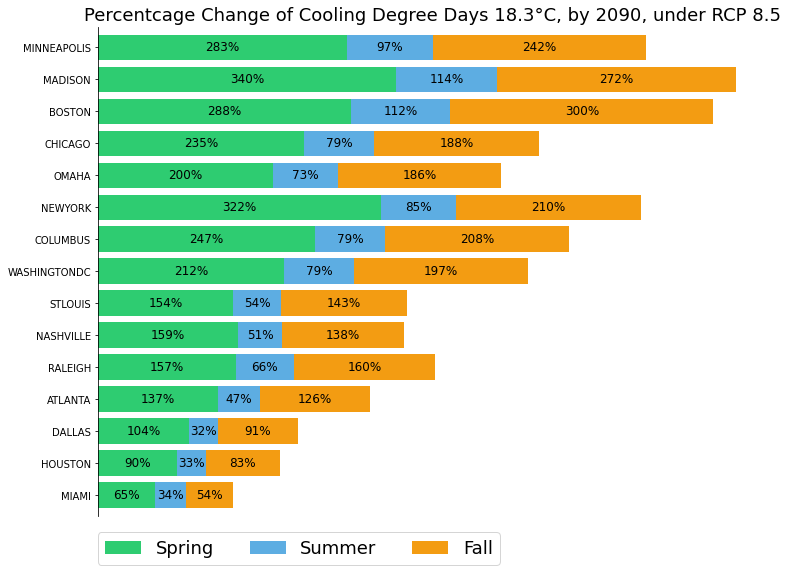

In [153]:
# remove winter 
# df=dplot_cdd85.drop(['DJF_20_90'],axis=1)
df=dplot_cdd85[['city','perchange_MAM','perchange_JJA','perchange_SON']]
df.set_index('city',inplace=True)
df.index.name = None

colors = ['#2ECC71','#5DADE2','#F39C12']

ax=df.plot.barh(figsize=(12,9),stacked=True,color=colors,width=0.8)
ax.set_xticks([])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)


for n in df: 
    for i, (cs, ab) in enumerate(zip(df.iloc[:, 0:].cumsum(1)[n],df[n])): 
        plt.text(cs-ab/2,i,str(int(ab))+'%',va='center',ha='center',color='black',fontsize=12)

plt.legend(["Spring",'Summer','Fall'],loc = (0,-0.1), ncol=3, fontsize=18)
plt.title('Percentcage Change of Cooling Degree Days 18.3°C, by 2090, under RCP 8.5',fontsize=18)
plt.savefig('results_plot/seasonal_perctchange_cdd183_by2090_85.png',bbox_inches='tight')


### 2). seasonal change of cdd18.3 , 2020-2090 

In [127]:
# dplot_cdd85

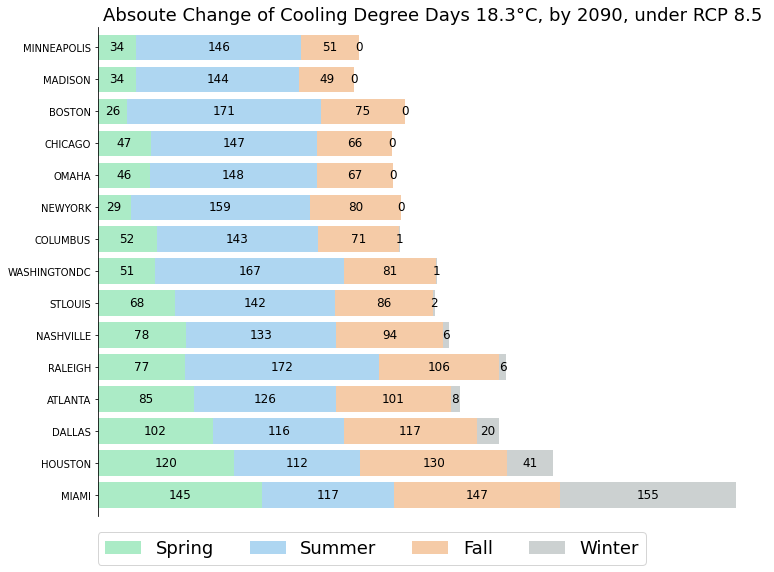

In [151]:
# remove winter 
df=dplot_cdd85[['city','abschange_MAM','abschange_JJA','abschange_SON','abschange_DJF']]
df.set_index('city',inplace=True)
df.index.name = None

colors = ['#ABEBC6','#AED6F1','#F5CBA7','#CCD1D1']

ax=df.plot.barh(figsize=(12,9),stacked=True,color=colors,width=0.8)
ax.set_xticks([])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)


for n in df: 
    for i, (cs, ab) in enumerate(zip(df.iloc[:, 0:].cumsum(1)[n],df[n])): 
        plt.text(cs-ab/2,i,str(int(ab)),va='center',ha='center',color='black',fontsize=12)

plt.legend(["Spring",'Summer','Fall','Winter'],loc = (0,-0.1), ncol=4, fontsize=18)
plt.title('Absoute Change of Cooling Degree Days 18.3°C, by 2090, under RCP 8.5',fontsize=18)
plt.savefig('results_plot/seasonal_abschange_cdd183_by2090_85.png',bbox_inches='tight')


### 2). seasonal change of hdd18.3, 2020-2090 
*for hdd, we onlu look spring and fall (shoulder seasons) and wonter(peak) 

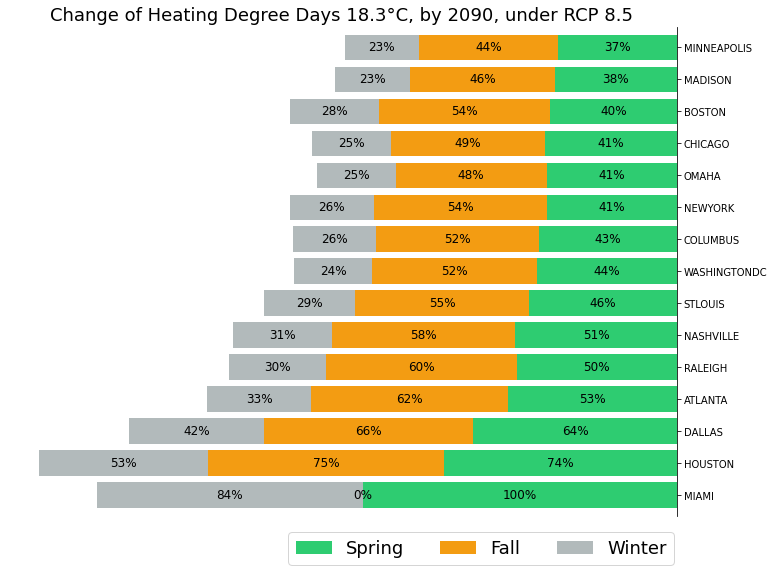

In [155]:
# remove summer 
df=dplot_hdd85[['city','perchange_MAM','perchange_SON','perchange_DJF']]
df.set_index('city',inplace=True)
df.index.name = None
# df=-df # change to positive value for plotting 

colors = ['#2ECC71','#F39C12','#B2BABB']

ax=df.plot.barh(figsize=(12,9),stacked=True,color=colors,width=0.8)
# ax.legend(["Spring",'Fall','Winter'],fontsize=15,loc='top left')
# ax.set_xlabel("Percentage Change ",fontsize=15)
ax.set_xticks([])
ax.yaxis.tick_right()

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)


for n in df: 
    for i, (cs, ab) in enumerate(zip(df.iloc[:, 0:].cumsum(1)[n],df[n])): 
        plt.text(cs-ab/2,i,str(int(-ab))+'%',va='center',ha='center',color='black',fontsize=12)

plt.legend(["Spring",'Fall','Winter'],loc = (0.42,-0.1), ncol=3, fontsize=18)
plt.title('Change of Heating Degree Days 18.3°C, by 2090, under RCP 8.5',fontsize=18)
plt.savefig('results_plot/seasonal_perctchange_hdd183_by2090_85.png',bbox_inches='tight')


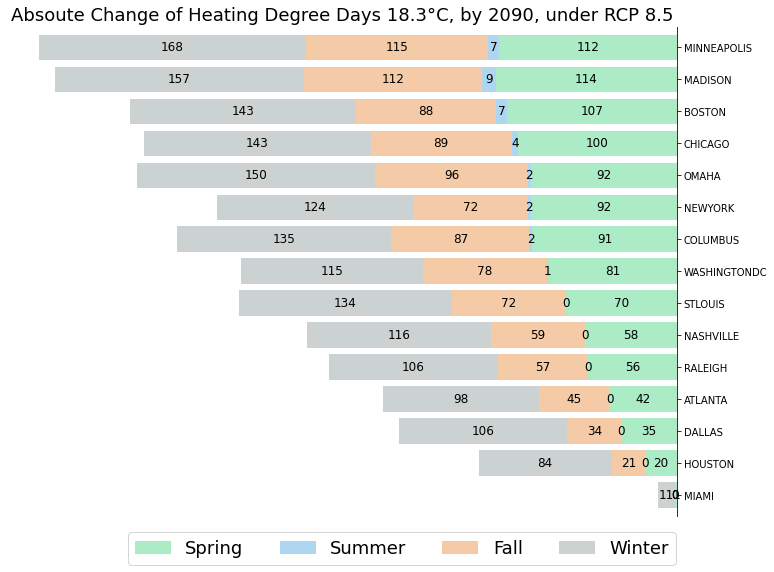

In [150]:
# remove winter 
df=dplot_hdd85[['city','abschange_MAM','abschange_JJA','abschange_SON','abschange_DJF']]
df.set_index('city',inplace=True)
df.index.name = None

colors = ['#ABEBC6','#AED6F1','#F5CBA7','#CCD1D1']

ax=df.plot.barh(figsize=(12,9),stacked=True,color=colors,width=0.8)
ax.set_xticks([])
ax.yaxis.tick_right()

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)


for n in df: 
    for i, (cs, ab) in enumerate(zip(df.iloc[:, 0:].cumsum(1)[n],df[n])): 
        plt.text(cs-ab/2,i,str(int(-ab)),va='center',ha='center',color='black',fontsize=12)

plt.legend(["Spring",'Summer','Fall','Winter'],loc = (0.18,-0.1), ncol=4, fontsize=18)
plt.title('Absoute Change of Heating Degree Days 18.3°C, by 2090, under RCP 8.5',fontsize=18)
plt.savefig('results_plot/seasonal_abschange_hdd183_by2090_85.png',bbox_inches='tight')


try plot CDD HDD together: 

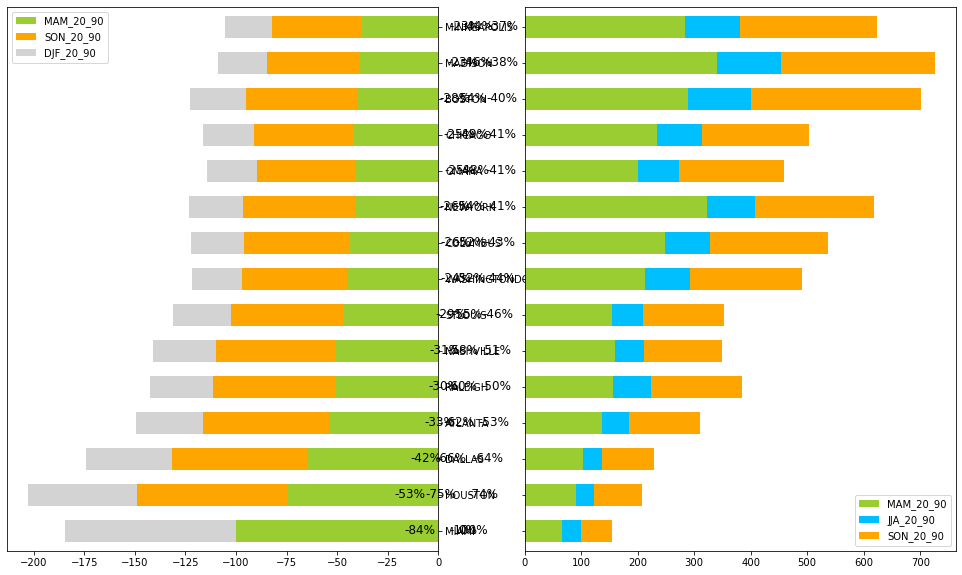

In [124]:
df=dplot_hdd85.drop(['JJA_20_90'],axis=1)
df.set_index('city',inplace=True)
df.index.name = None

df2=dplot_cdd85.drop(['DJF_20_90'],axis=1)
df2.set_index('city',inplace=True)
df2.index.name = None


fig, (ax,ax2) = plt.subplots(figsize=(17,10),ncols=2, sharey=True)

colors = ['yellowgreen','orange','lightgray']
colors2 = ['yellowgreen','deepskyblue','orange']

# ax.invert_xaxis()
ax.yaxis.tick_right()

df.plot(kind='barh',stacked=True,color=colors,width=0.6,ax=ax)
for n in df: 
    for i, (cs, ab) in enumerate(zip(df.iloc[:, 0:].cumsum(1)[n],df[n])): 
        plt.text(cs-ab/2,i,str(int(ab))+'%',va='center',ha='center',color='black',fontsize=12)

df2.plot(kind='barh',stacked=True,color=colors2,width=0.6,ax=ax2)
# for n in df2: 
#     for i, (cs, ab) in enumerate(zip(df2.iloc[:, 0:].cumsum(1)[n],df2[n])): 
#         plt.text(cs-ab/2,i,str(int(ab))+'%',va='center',ha='center',color='black',fontsize=12)

plt.show()
